# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Кондрашин Дмитрий. Вариант №13

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

**МНК (Метод Наименьших Квадратов)**
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$\
\
Нормальные уравнения: $XX^{\intercal}\beta=XY$\
Решение системы нормальных уравнений в регулярном случае: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$\
\
$RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}$\
$\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=1...m$

**Доверительный интервал**

ДНО - функция: $\psi(\beta) = C^\intercal\beta$

МНК оценка: $\hat{\psi}= C^\intercal\hat{\beta}$

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi) $

Тогда $\frac{\hat{\psi} - {\psi}}{S\sqrt{b_\psi}} \sim S_{n-r}$

Доверительный интервал: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

 **Доверительный эллипсоид**

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\frac{\left(\hat{\psi} - {\psi}\right)^\intercal {b_\psi}^{-1} \left(\hat{\psi} - {\psi}\right)}{qS^2} \sim \mathcal{F}_{q,n-r}$

Доверительный эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

**Несмещённая оценка дисперсии $(S^{2})$**

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

$SS_{e}=RSS(\widehat{\beta})$, а r-ранг матрицы X

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$



Альтернативная форма записи модели линейной регрессии

$ Y = X^T \beta + e  \quad \mathbb{E}_\theta +\varepsilon = 0 \quad Var_\theta e = \sigma^2 E$

Система нормальных уравнений:

$ X X^T \beta = X Y $

Решение системы нормальных уравнений в регулярном случае:

$ \hat{\beta} = (X X^T)^{-1} XY $

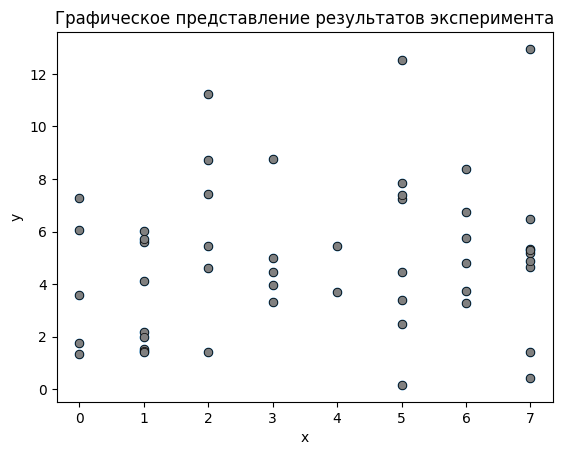

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as st
import scipy.stats as sc
from scipy.stats import chi2
import scipy.stats as sps
import scipy.optimize as spo

y = np.array( [3.57, 3.97, 1.52, 5.32, 5.61, 4.65, 8.74, 2.19, 1.98, 6.48, 4.61, 7.29, 1.44, 5.18, 4.10, 6.05, 12.53,
      3.40, 6.76, 8.38, 11.23, 4.79, 5.31, 1.43, 1.33, 3.31, 7.84, 6.02, 7.24, 7.39, 0.16, 3.69, 4.44, 4.98,
      5.45, 3.28, 4.47, 5.70, 7.41, 1.42, 12.95, 1.75, 3.75, 5.44, 2.48, 1.41, 0.44, 4.86, 5.74, 8.77])

x = np.array( [0, 3, 1, 7, 1, 7, 2, 1, 1, 7, 2, 0, 1, 7, 1, 0, 5,
      5, 6, 6, 2, 6, 7, 7, 0, 3, 5, 1, 5, 5, 5, 4, 5, 3,
      2, 6, 3, 1, 2, 1, 7, 0, 6, 4, 5, 2, 7, 7, 6, 3])
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графическое представление результатов эксперимента")
plt.scatter(x, y, color='gray', edgecolors='black', linewidths=0.5)
plt.show()

In [82]:
Y_matrix = np.matrix(y).T
X_matrix = np.matrix([[1] * len(x), x])

Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0, 0])
beta_1 = float(Beta_matrix[1, 0])
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
print("b0:", round(beta_0, 3) )
print("b1:", round(beta_1, 3))
print("(XXT)^-1",XX_T_inv)

b0: 4.201
b1: 0.209
(XXT)^-1 [[ 0.06506965 -0.01231411]
 [-0.01231411  0.00336451]]


МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \end{array} \right) = \left( \begin{array}{c} 4.201 \\ 0.209 \end{array} \right) $

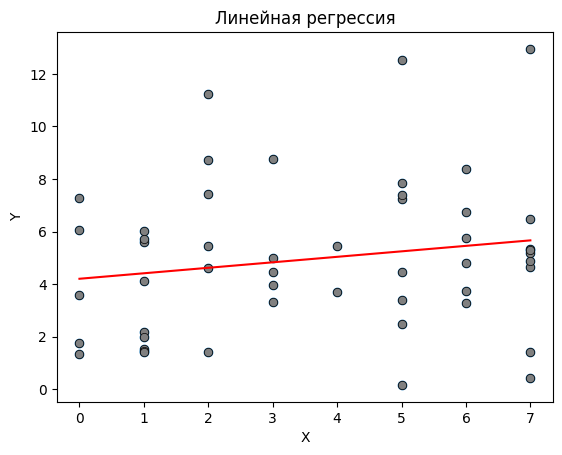

In [83]:
b = np.array([beta_0, beta_1])
plt.scatter(x, y)
plt.plot([min(x), max(x)], [beta_0 + beta_1 * min(x), beta_0 + beta_1 * max(x)], color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.scatter(x, y, color='gray', edgecolors='black', linewidths=0.5)
plt.show()

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 1.8 $. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.01$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии:

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{48} \approx 8.25$

Где r - ранг матрицы = 2

In [84]:
var = np.linalg.norm((Y_matrix - X_matrix.T * Beta_matrix).T*(Y_matrix - X_matrix.T * Beta_matrix)) /(len(x) - np.linalg.matrix_rank(X_matrix))
print("Rang =",np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", var)

Rang = 2
Несмещённая оценка дисперсии = 8.249918508456139


-5.222228652176839
7.28777134782316


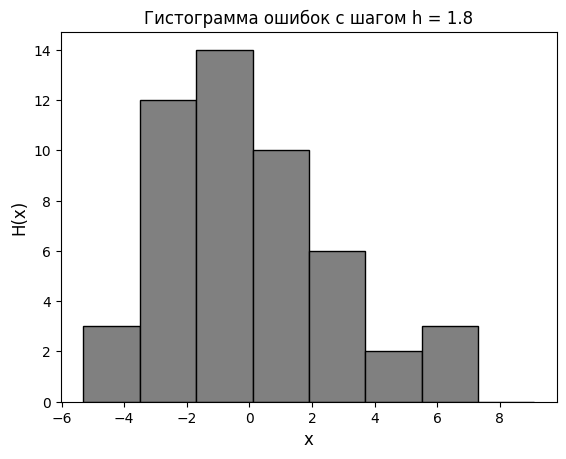

In [85]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
mean_mistakes = 0
std_mistakes = np.sqrt(var)
mistakes = Y_matrix - X_matrix.T * Beta_matrix
min_mistake_scalar = float(np.min(mistakes))
max_mistake_scalar = float(np.max(mistakes))
h = 1.8
plt.title("Гистограмма ошибок с шагом h = 1.8")
plt.xlabel('x', fontsize=12)
plt.ylabel('H(x)', fontsize=12)
min_mistake_scalar = float(np.min(mistakes))
max_mistake_scalar = float(np.max(mistakes))

print(min_mistake_scalar)

print(max_mistake_scalar)


counts, bins = np.histogram(mistakes, bins=[i / 100 for i in range((int(min_mistake_scalar)*100)-30, (int(max_mistake_scalar)*100)+300, int(h*100))])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='gray')
plt.show()

**Оценим соответствует ли распределение ошибок нормальному распредлению.**

При $ a_0 = 0 $ и $ S^2 = 8.25$ и $ \alpha_1 = 0.01 $

$I_{1}=\left(-\infty, -3.42 \right], n_{1}=3$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{5}=\left(1.98, 3.78\right], n_{5}=6$

$P_{1}=0.117$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{5}=0.151$  

$I_{2}=\left(-3.42, -1.62 \right], n_{2}=12$ $\quad\quad\quad\quad\quad\quad\quad$ $I_{6}=\left(3.78, 5.58\right], n_{6}=2$  

$P_{2}=0.169$   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{6}=0.068$  

$I_{3}=\left(-1.62,0.18 \right], n_{3}=14$  $\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{7}=\left(5.58, +\infty\right], n_{7}=3$  

$P_{3}=0.239$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{7}=0.026$  

$I_{4}=\left(0.18,1.98 \right], n_{4}=10$  

$P_{4}=0.23$  


 **Вычисление статистики критерия $\chi^2$:**

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 6.52$

   **Сравнение с критическим значением:**
   - Из таблицы для распределения $\chi^2$ с 6 степенями свободы при уровне значимости $\alpha = 0.01$ значение критерия составляет $\chi_{6, 0.99}^2 \approx 16.81$.
   - Так как $\chi_{6, 0.99}^2 > \chi^2 $, гипотеза принимается.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.368$




In [86]:
#Расчёты

from re import match
from math import inf

I = [(-inf, -3.42), (-3.42,-1.62), (-1.62,0.18), (0.18, 1.98),(1.98, 3.78),(3.78, 5.58),(5.58,+inf)]
a0=0
sigma0=8.25
n=len(y)
alpha = 0.01
n_i = [3,12,14,10,6,2,3];p_i = [];np_i = [];n_i_np_i = [];res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=std_mistakes) - sc.norm.cdf(i[0], loc=a0,scale=std_mistakes), 7))
print("Pi = ",p_i)
for i in range (7):
 np_i.append(round(n*p_i[i],7))
#print(np_i)
for i in range(7):
 n_i_np_i.append(round(n_i[i] - np_i[i], 7))
for i in range(7):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 7))
print("xsi^2 = ", sum(res))
chi2_val_5_09 = chi2.ppf(1-alpha, 6)
print('chi2_val',chi2_val_5_09)
chi2 = 6.52
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 6), 3))

Pi =  [0.1168863, 0.1694859, 0.2386125, 0.2297141, 0.1512198, 0.0680562, 0.0260252]
xsi^2 =  6.520460100000001
chi2_val 16.811893829770927
Наибольшее значение уровня значимости = 0.368


In [87]:
Dn =sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic
print("Статистика критерия Колмогорова Dn:", Dn)
x_a = sps.ksone.ppf(0.99, 50)
print("x_alpha",x_a)


print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Статистика критерия Колмогорова Dn: 0.10293549054068768
x_alpha 0.2106765432666897
Наибольшее значение уровня значимости = 0.3243174427429809


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.21 \\ 1, \quad \widehat{D_n} > 0.21 \end{cases}$


Т.к. $\widehat{D_n} < x_\alpha$, гипотеза  принимается.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.324$


C:\Users\Honor MagicBook Pro\AppData\Local\Temp\ipykernel_20636\1325884026.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mistakes_range = np.arange(min(mistakes), max(mistakes) + 1, 0.01)


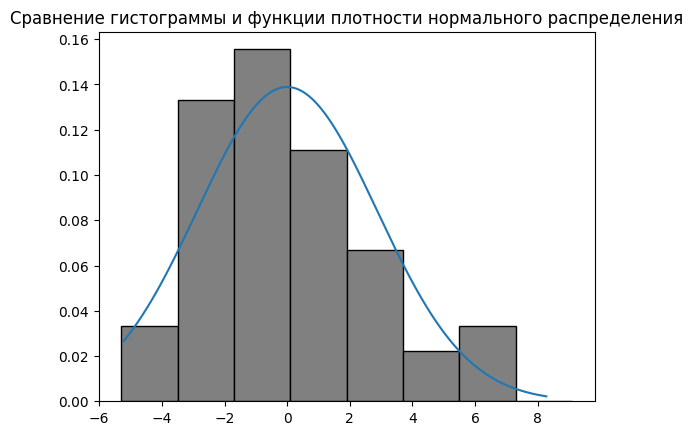

In [88]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
counts, bins = np.histogram(mistakes, bins=[i / 100 for i in range((int(min_mistake_scalar)*100)-30, (int(max_mistake_scalar)*100)+300, int(h*100))])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='gray', density= True)
mistakes_range = np.arange(min(mistakes), max(mistakes) + 1, 0.01)


plt.plot(mistakes_range, sps.norm.pdf(mistakes_range, mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Анализируя получившийся график, можно сказать, что в среднем расстояние между рассматриваемыми функциями распределения достаточно мало, но визуальная оценка может быть недостаточной для однозначного заключения о нормальности данных.

### 3.В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$.Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

ДНО функция: $\psi = C^T \beta $

Элемент дисперсии оценки: $ b_\psi = C^T (XX^T)^{-1}C$

Тогда: $ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha$:

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $, 


$[ \widehat \psi -x_{\alpha}s\sqrt{b} , \widehat \psi + x_{\alpha}s\sqrt{b}] \ni \psi$ 

где квантиль $ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$x_{\alpha} = S_{n - 2}(1 - \frac{\alpha}{2}) = 2.6822$


- **Вычислим $\beta_0:$** 

  $\psi_{\beta_0} = \begin{pmatrix}
    1 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix}$

    $b_{\psi_{\beta_0}} =  \begin{pmatrix}
    1 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    1 \\ 0
    \end{pmatrix} = 0.065$

    
  
- **Вычислим $\beta_1:$**

  $\psi_{\beta_1} = \begin{pmatrix}
    0 \\
    1
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix}$
  
    $b_{\psi_{\beta_1}} =  \begin{pmatrix}
    0 & 1
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 1
    \end{pmatrix} = 0.0034$


$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_0}}}} \sim S_{n-2} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_1}}}} \sim S_{n-2} $




In [89]:
from scipy import stats
import scipy

r = np.linalg.matrix_rank(X_matrix)
n = len(x)
alpha = 0.01
func = stats.t(n - 2)
x_alpha = func.ppf(1 - alpha/2)
print(f'x_alpha: {round(x_alpha, 4)}')

e1 = np.array([1,0])
e2 = np.array([0,1])

e3 = np.array([[0], [1]])
e =  np.array([[1], [0]])
b1 = e1 * XX_T_inv * e
b2 = e2 *XX_T_inv*e3
print("b0 = ",b1)
print("b1 = ",b2)


left = beta_0 - x_alpha * np.sqrt(var) * np.sqrt(b1)
right = beta_0 + x_alpha * np.sqrt(var) * np.sqrt(b1)
print("Интервал для b1 (",left,right,")")
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
left = beta_1 - x_alpha * np.sqrt(var) * np.sqrt(b2)
right = beta_1 + x_alpha * np.sqrt(var) * np.sqrt(b2)
print("Интервал для b2 (",left,right,")")



x_alpha: 2.6822
b0 =  [[0.06506965]]
b1 =  [[0.00336451]]
Интервал для b1 ( [[2.23577505]] [[6.16616694]] )
Интервал для b2 ( [[-0.23811523]] [[0.65561741]] )


$\left[2.24, 6.17\right] \ni \beta_0$

$\left[-0.24, 0.66\right] \ni \beta_1$

**Построим доверительный эллипс для параметра $(\beta_0, \beta_1)$ уровня доверия 1 - $\alpha$**

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T B^{-1} (\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$, 

где $ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$

In [90]:
fx = 0.99
x_a = sps.f.ppf(fx, 2, 48)
print("x_a =", round(x_a, 3))

x_a = 5.077


In [91]:
b0_val = []
b1_val = []

for b0 in np.arange(0, 10, 0.01):
  for b1 in np.arange(-2, 5, 0.01):
    x = np.array([b0, b1])
    psi = np.array([4.201, 0.209])
    X = np.array( [0, 3, 1, 7, 1, 7, 2, 1, 1, 7, 2, 0, 1, 7, 1, 0, 5,
      5, 6, 6, 2, 6, 7, 7, 0, 3, 5, 1, 5, 5, 5, 4, 5, 3,
      2, 6, 3, 1, 2, 1, 7, 0, 6, 4, 5, 2, 7, 7, 6, 3])
    q = 2
    S2 = 8.25
    x_a = 5.077

    x_psi = x - psi
    XXT = np.dot(X, np.transpose(X))

    if np.dot(np.dot(np.transpose(x_psi), XXT), x_psi) <= q * S2 * x_a:
      b0_val.append(round(b0, 3))
      b1_val.append(round(b1, 3))


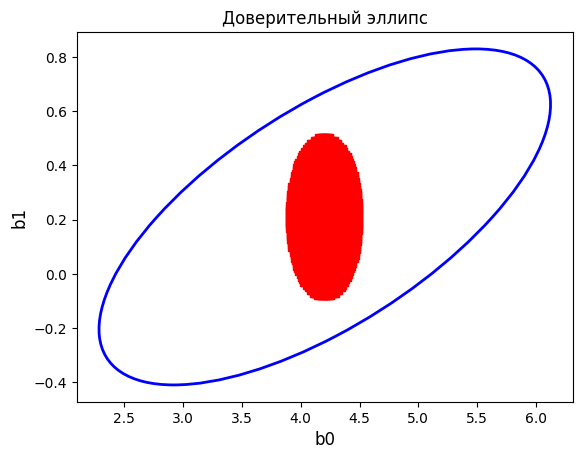

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
# Ваш код для вычисления b0_val и b1_val

# Доверительные интервалы
b0_interval = [2.24, 6.17]
b1_interval = [-0.24, 0.66]

# Средние значения
b0_mean = (b0_interval[0] + b0_interval[1]) / 2
b1_mean = (b1_interval[0] + b1_interval[1]) / 2

# Размеры эллипса
b0_std = (b0_interval[1] - b0_interval[0]) / 2
b1_std = (b1_interval[1] - b1_interval[0]) / 2

# Угол наклона эллипса
angle = np.degrees(np.arctan2(b1_interval[1] - b1_interval[0], b0_interval[1] - b0_interval[0]))

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Строим точки
ax.scatter(b0_val, b1_val, marker=',', color='red')

# Строим доверительный эллипс
ellipse = Ellipse((b0_mean, b1_mean), width=b0_std * 2, height=b1_std * 2, angle=angle,
                  edgecolor='blue', fc='None', lw=2)

# Добавляем эллипс к осям
ax.add_patch(ellipse)

# Настройка графика
plt.title('Доверительный эллипс')
plt.xlabel('b0', fontsize=12)
plt.ylabel('b1', fontsize=12)

plt.show()




**Вычислим его полуоси**

$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$


Большая полуось\
$ a  = 2.38$
\
Малая полуось\
$ b = 0.29 $


In [93]:
XX_T = np.dot(X_matrix, X_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(XX_T)



func = stats.f(2, n - 2)
x_alpha = func.ppf(1 - alpha)
print(f'x_alpha: {round(x_alpha, 4)}')

a = np.sqrt((2 * var * x_alpha) / eigenvalues[0])
b =  np.sqrt((2 * var * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {round(a, 4)}')
print(f'Малая полуось: {round(b, 4)}')


x_alpha: 5.0767
Большая полуось: 2.3767
Малая полуось: 0.2891


### 4) Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

ДНО функция: 
$\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} \Rightarrow$, $\widehat \psi = \widehat \beta_1 $

In [94]:
c = np.array([0, 1])
b = np.dot(np.dot(c.T, XX_T_inv), c)
q = 1
r = 2
F = beta_1**2 / (  b*var)
print("Статистика F = " , F)

x_alpha = stats.f(q, 48).ppf(1 - alpha)
print("x_alpha = " , x_alpha)
F = 1.57
print("p_value", round(1 - sps.f.cdf(F, 1, 48), 3))

Статистика F =  [[1.56995025]]
x_alpha =  7.194218442187959
p_value 0.216


$\mathbb{F} \approx 1.57$

$x_{\alpha} \approx 7.19$

$\mathbb{F} < x_{\alpha_2} \to$ Гипотезу принимаем

### 5.Сформулировать модель включающую доплнительный член с $X^2$.Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$



Альтернативная форма записи модели линейной регрессии

$ Y = X^T \beta + e  \quad \mathbb{E}_\theta +\varepsilon = 0 \quad Var_\theta e = \sigma^2 E$

Система нормальных уравнений:

$ X X^T \beta = X Y $

Решение системы нормальных уравнений в регулярном случае:

$ \hat{\beta} = (X X^T)^{-1} XY $

In [95]:
y = np.array( [3.57, 3.97, 1.52, 5.32, 5.61, 4.65, 8.74, 2.19, 1.98, 6.48, 4.61, 7.29, 1.44, 5.18, 4.10, 6.05, 12.53,
      3.40, 6.76, 8.38, 11.23, 4.79, 5.31, 1.43, 1.33, 3.31, 7.84, 6.02, 7.24, 7.39, 0.16, 3.69, 4.44, 4.98,
      5.45, 3.28, 4.47, 5.70, 7.41, 1.42, 12.95, 1.75, 3.75, 5.44, 2.48, 1.41, 0.44, 4.86, 5.74, 8.77])

x = np.array( [0, 3, 1, 7, 1, 7, 2, 1, 1, 7, 2, 0, 1, 7, 1, 0, 5,
      5, 6, 6, 2, 6, 7, 7, 0, 3, 5, 1, 5, 5, 5, 4, 5, 3,
      2, 6, 3, 1, 2, 1, 7, 0, 6, 4, 5, 2, 7, 7, 6, 3])

Y_matrix = np.matrix(y).T
X_matrix = np.matrix([[1] * len(x), x, [i**2 for i in x]])
print("Определитель матрицы X*X_transpose = ", np.linalg.det(X_matrix * X_matrix.T))
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0, 0])
beta_1 = float(Beta_matrix[1, 0])
beta_2 = float(Beta_matrix[2, 0])
XX_T_inv = np.linalg.inv(X_matrix * X_matrix.T)
print(XX_T_inv)
print("b0:", round(beta_0, 3) )
print("b1:", round(beta_1, 3))
print("b2:", round(beta_2, 3))


Определитель матрицы X*X_transpose =  14159079.999999978
[[ 0.12107849 -0.06813155  0.00766716]
 [-0.06813155  0.05899119 -0.00764096]
 [ 0.00766716 -0.00764096  0.00104957]]
b0: 3.486
b1: 0.922
b2: -0.098


МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_2 \end{array} \right) = \left( \begin{array}{c} 3.484 \\ 0.922 \\ -0.098 \end{array} \right) $

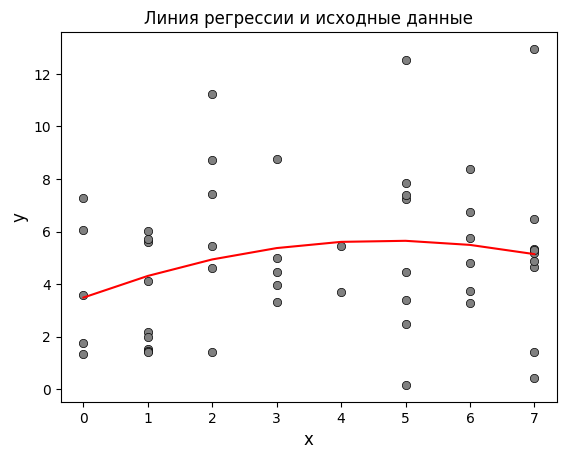

In [96]:
y =  [3.57, 3.97, 1.52, 5.32, 5.61, 4.65, 8.74, 2.19, 1.98, 6.48, 4.61, 7.29, 1.44, 5.18, 4.10, 6.05, 12.53,
      3.40, 6.76, 8.38, 11.23, 4.79, 5.31, 1.43, 1.33, 3.31, 7.84, 6.02, 7.24, 7.39, 0.16, 3.69, 4.44, 4.98,
      5.45, 3.28, 4.47, 5.70, 7.41, 1.42, 12.95, 1.75, 3.75, 5.44, 2.48, 1.41, 0.44, 4.86, 5.74, 8.77]

x =  [0, 3, 1, 7, 1, 7, 2, 1, 1, 7, 2, 0, 1, 7, 1, 0, 5,
      5, 6, 6, 2, 6, 7, 7, 0, 3, 5, 1, 5, 5, 5, 4, 5, 3,
      2, 6, 3, 1, 2, 1, 7, 0, 6, 4, 5, 2, 7, 7, 6, 3]

b = [beta_0, beta_1, beta_2]
plt.title('Линия регрессии и исходные данные')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(x, y, color='gray', edgecolors='black', linewidths=0.5)

X_val = np.array(sorted(x))
X = np.array([[1] * 50, X_val, X_val**2])

plt.plot(X_val, np.dot(np.transpose(X), b), 'r')
plt.show()

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещённая оценка дисперсии:

$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{48} \approx 8.23$

Где r - ранг матрицы = 3

In [97]:
var = np.linalg.norm((Y_matrix - X_matrix.T * Beta_matrix).T*(Y_matrix - X_matrix.T * Beta_matrix)) /(len(x) - np.linalg.matrix_rank(X_matrix))
print("Rang =",np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", var)

Rang = 3
Несмещённая оценка дисперсии = 8.231029830654943


[[-5.48578571]] [[7.81117805]]


C:\Users\Honor MagicBook Pro\AppData\Local\Temp\ipykernel_20636\1272907476.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "gray")


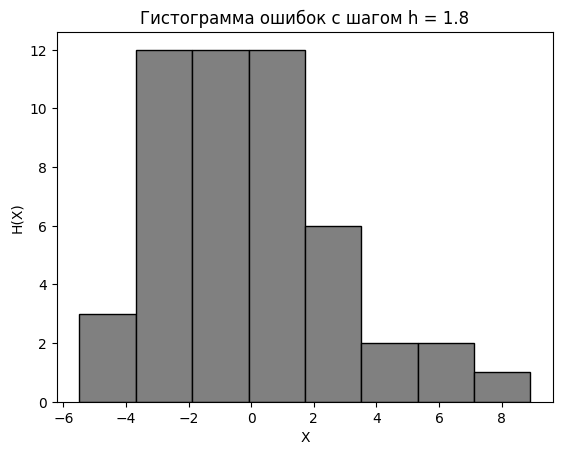

In [98]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
mean_mistakes = 0
std_mistakes = np.sqrt(var)
mistakes = Y_matrix - X_matrix.T * Beta_matrix

h = 1.8
plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "gray")
print(min(mistakes), max(mistakes))
plt.xlabel('X')
plt.ylabel('H(X)')
plt.title("Гистограмма ошибок с шагом h = 1.8")
plt.show()



**Оценим соответствует ли распределение ошибок нормальному распредлению.**

При $ a_0 = 0 $ и $ S^2 = 8.23$ и $ \alpha_1 = 0.01 $

$I_{1}=\left(-\infty, -3.69 \right], n_{1}=3$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $I_{5}=\left(1.71, 3.51\right], n_{5}=6$

$P_{1}=0.117$  $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$  $P_{5}=0.151$  

$I_{2}=\left(-3.69, -1.89 \right], n_{2}=12$ $\quad\quad\quad\quad\quad\quad\quad$            $I_{6}=\left(3.51, +\infty\right], n_{6}=5$  

$P_{2}=0.169$   $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ $P_{6}=0.068$  

$I_{3}=\left(-1.89,-0.09 \right], n_{3}=12$  

$P_{3}=0.239$  

$I_{4}=\left(-0.09,1.71 \right], n_{4}=12$  

$P_{4}=0.23$  


 **Вычисление статистики критерия $\chi^2$:**

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 3.72$

   **Сравнение с критическим значением:**
   - Из таблицы для распределения $\chi^2$ с 6 степенями свободы при уровне значимости $\alpha = 0.01$ значение критерия составляет $\chi_{6, 0.99}^2 \approx 16.81$.
   - Так как $\chi_{6, 0.99}^2 > \chi^2 $, гипотеза принимается.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.589$

In [99]:
from re import match
from math import inf
from scipy.stats import chi2
I = [(-inf, -3.69), (-3.69,-1.89), (-1.89,-0.09), (-0.09, 1.71),(1.71, 3.51),(3.51,+inf)]
a0=0
sigma0=8.23
n=len(y)

alpha = 0.01
n_i = [3,12,12,12,6,5];p_i = [];np_i = [];n_i_np_i = [];res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=sigma0**0.5) - sc.norm.cdf(i[0], loc=a0,scale=sigma0**0.5), 7))
print("pi=",p_i)
for i in range (6):
 np_i.append(round(n*p_i[i],7))
#print(np_i)
for i in range(6):
 n_i_np_i.append(round(n_i[i] - np_i[i], 7))
for i in range(6):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 7))
print("xsi^2", sum(res))
chi2_val = chi2.ppf(1-0.01,5)
print('chi2_val',chi2_val_5_09)
chi2 = 3.73
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 5), 3))

pi= [0.0991774, 0.1558307, 0.2324784, 0.2369489, 0.164996, 0.1105687]
xsi^2 3.7251149999999993
chi2_val 16.811893829770927
Наибольшее значение уровня значимости = 0.589


In [100]:
Dn = sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic
print("Статистика критерия Колмогорова Dn:", Dn)
x_a = sps.ksone.ppf(0.99, 50)
print(x_a)
print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Статистика критерия Колмогорова Dn: 0.10531315418826104
0.2106765432666897
Наибольшее значение уровня значимости = 0.3081516222243529


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.21 \\ 1, \quad \widehat{D_n} > 0.21 \end{cases}$


Т.к. $\widehat{D_n} < x_\alpha$, гипотеза  принимается.

   Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $0.308$

C:\Users\Honor MagicBook Pro\AppData\Local\Temp\ipykernel_20636\2501215234.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "gray",density= True)


[[-5.48578571]] [[7.81117805]]


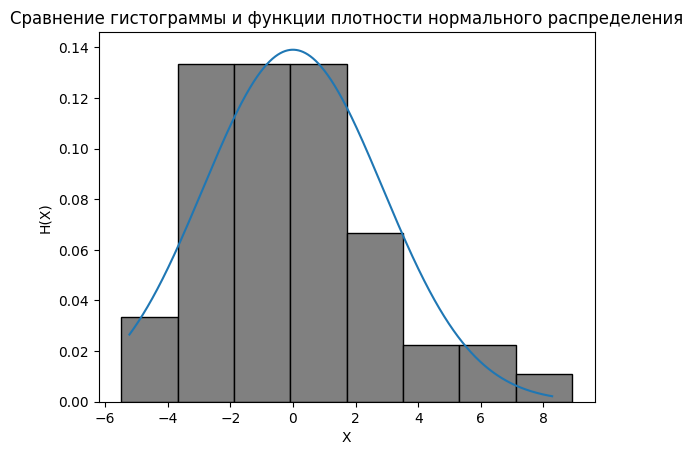

In [101]:

plt.plot(mistakes_range, sps.norm.pdf(mistakes_range, mean_mistakes, std_mistakes))
plt.hist(mistakes, bins=np.arange(min(mistakes), max(mistakes) + h, h), edgecolor='black',color = "gray",density= True)
print(min(mistakes), max(mistakes))
plt.xlabel('X')
plt.ylabel('H(X)')
plt.title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Анализируя получившийся график, можно сказать, что в среднем расстояние между рассматриваемыми функциями распределения достаточно мало, но визуальная оценка может быть недостаточной для однозначного заключения о нормальности данных.

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

ДНО функция: $\psi = C^T \beta $

Элемент дисперсии оценки: $ b_\psi = C^T (XX^T)^{-1}C$

Тогда: $ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

Доверительный интервал уровня доверия $1 - \alpha$:

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $


$[ \widehat \psi -x_{\alpha}s\sqrt{b} , \widehat \psi + x_{\alpha}s\sqrt{b}] \ni \psi$ 

где квантиль $ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$x_{\alpha} = S_{n - 3}(1 - \frac{\alpha}{2}) = 2.6846$

- **Вычислим $\beta_0:$**

  $\psi_{\beta_0} = \begin{pmatrix}
    1 \\
    0 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$

    $b_{\psi_{\beta_0}} =  \begin{pmatrix}
    1 & 0 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    1 \\ 0 \\ 0
    \end{pmatrix} = 0.12$

    
  
- **Вычислим $\beta_1:$**

  $\psi_{\beta_1} = \begin{pmatrix}
    0 \\
    1 \\
    0
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$
  
    $b_{\psi_{\beta_1}} =  \begin{pmatrix}
    0 & 1 & 0
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 1 \\ 0
    \end{pmatrix} = 0.059$

- **Вычислим $\beta_2:$**

  $\psi_{\beta_2} = \begin{pmatrix}
    0 \\
    0 \\
    1
    \end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2
    \end{pmatrix}$
  
    $b_{\psi_{\beta_2}} =  \begin{pmatrix}
    0 & 0 & 1
    \end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
    0 \\ 0 \\ 1
    \end{pmatrix} = 0.0010$

    
$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_0}}}} \sim S_{n-3} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_1}}}} \sim S_{n-3} $

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b_{\psi_{\beta_2}}}} \sim S_{n-3} $




In [105]:
alpha = 0.01
x_alpha = stats.t(n - 3).ppf(1 - alpha / 2)
print(f'x_alpha: {round(x_alpha, 4)}')


e0 = np.array([1, 0, 0])
e0_1 = np.array([[1], [0], [0]])
e1 = np.array([0, 1, 0])
e1_1 = np.array([[0], [1], [0]])
e2 = np.array([0, 0, 1])
e2_1 = np.array([[0], [0], [1]])

b1 = e0*XX_T_inv*e0_1
b2 = e1*XX_T_inv*e1_1
b3 = e2*XX_T_inv*e2_1
print(b1,b2,b3)
left = beta_0 - x_alpha * np.sqrt(var) * np.sqrt(b1)
right = beta_0 + x_alpha * np.sqrt(var) * np.sqrt(b1)
print("Интервал для b0 (",left,right,")")

left = beta_1 - x_alpha * np.sqrt(var) * np.sqrt(b2)
right = beta_1 + x_alpha * np.sqrt(var) * np.sqrt(b2)
print("Интервал для b1 (",left,right,")")

left = beta_2 - x_alpha * np.sqrt(var) * np.sqrt(b3)
right = beta_2 + x_alpha * np.sqrt(var) * np.sqrt(b3)
print("Интервал для b2 (",left,right,")")



x_alpha: 2.6846
[[0.12107849]] [[0.05899119]] [[0.00104957]]
Интервал для b0 ( [[0.80558628]] [[6.16556399]] )
Интервал для b1 ( [[-0.94895021]] [[2.79235444]] )
Интервал для b2 ( [[-0.34745236]] [[0.15158836]] )


$\left[0.806, 6.17\right] \ni \beta_0$

$\left[-0.95, 2.79\right] \ni \beta_1$

$\left[-0.35, 0.151\right] \ni \beta_2$

**Построим доверительный эллипс для параметра $(\beta_0, \beta_1)$ уровня доверия 1 - $\alpha$**

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T B^{-1} (\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$

$ A_\alpha = \{\overrightarrow{x}: (\overrightarrow{x} - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\overrightarrow{x} - \widehat \psi) \le qs^2x_\alpha\}$, 

где $ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$

$C = \begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_2 z^2 \le qs^2x_\alpha$, где $\lambda_1$, $\lambda_2$ и $\lambda_3$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2  + \cfrac{\lambda_2}{qs^2x_\alpha}z^2\le 1$

**Уравнение Элипса:**

$349.03x^2 + 0.058y^2 + 0.6192z^2 < 1$ 

In [103]:
XX_T = np.dot(X_matrix, X_matrix.T)
eigenvalues, eigenvectors = np.linalg.eig(XX_T)
beta = [beta_0, beta_1, beta_2]
#print(f'\nМатрица перехода: \n {eigenvectors}\n')
#print(f'\nСобственные числа: \n {eigenvalues}\n')

x_alpha = stats.f(3, n - 2).ppf(1 - alpha)
print(f'x_alpha: {round(x_alpha, 4)}')

a = np.sqrt((2 * var * x_alpha) / eigenvalues[0])
b =  np.sqrt((2 * var * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {round(a, 4)}')
print(f'Малая полуось: {round(b, 4)}')

#print(f'Beta: {beta}')

factors = []
denominator = 3 * var * x_alpha
for lmbd in eigenvalues:
    factors.append(lmbd / denominator)
    
#print(f'{round(factors[0] , 4)}x^2 + {round(factors[1] , 4)}y^2 + {round(factors[2] , 4)}z^2')

x_alpha: 4.218
Большая полуось: 0.0437
Малая полуось: 3.3908


### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Основная гипотеза: $H_0 : \psi = 0$

ДНО - функция: 
$\psi = C^T \beta $

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} \Rightarrow$, $\widehat \psi = \widehat \beta_2 $

In [104]:
c = np.array([0, 0, 1])
b = np.dot(np.dot(c.T, XX_T_inv), c)

q = 1
r = 3
F = beta_2 ** 2 / (b * q * var)
print("Статистика F = " , F)

x_alpha = stats.f(q, 47).ppf(1 - alpha)
print("x_alpha = " , x_alpha)

F = 1.11
print("p_value", round(1 - sps.f.cdf(F, 1, 47), 3))

Статистика F =  [[1.11015104]]
x_alpha =  7.2068388654187014
p_value 0.297


$\mathbb{F} \approx 1.11$

$x_{\alpha} \approx 7.21$

$\mathbb{F} < x_{\alpha_2} \to$ Гипотезу принимаем

## Выводы

В ходе выполнения практической работы была разработана модель линейной регрессии для зависимости переменной Y от X, используя метод наименьших квадратов (МНК) для вычисления параметров модели. Также были вычислены несмещенные оценки дисперсии, проведена проверка гипотезы о нормальности ошибок с уровнем значимости $\alpha$ по $\chi^2$, и оценено расстояние до нормального распределения по Колмогорову. 
Сформированы навыки посторения МНК оценок, доверительных эллипсов и эллипсоидов, проверки гипотез о независимости и линейной регрессионной зависимости.